# Mandar Sanjay Chaudhari
# 220968222
# Section B Batch B4
# Week 8
# Breast Cancer PCA

In [1]:
from sklearn.datasets import load_breast_cancer


In [2]:
breast = load_breast_cancer()


In [3]:
breast_data = breast.data


In [4]:
breast_data.shape


(569, 30)

In [5]:
breast_labels = breast.target


In [6]:
breast_labels.shape


(569,)

In [7]:
import numpy as np

labels = np.reshape(breast_labels,(569,1))


In [8]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)


In [9]:
final_breast_data.shape


(569, 31)

In [10]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)


In [11]:
features = breast.feature_names


In [12]:
features_labels = np.append(features,'label')


In [13]:
breast_dataset.columns = features_labels


In [14]:
breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)


In [16]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features


In [17]:
np.mean(x),np.std(x)


(-6.826538293184326e-17, 1.0)

In [18]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)


In [19]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)


In [20]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])


In [21]:
principal_breast_Df.tail()


,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [22]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

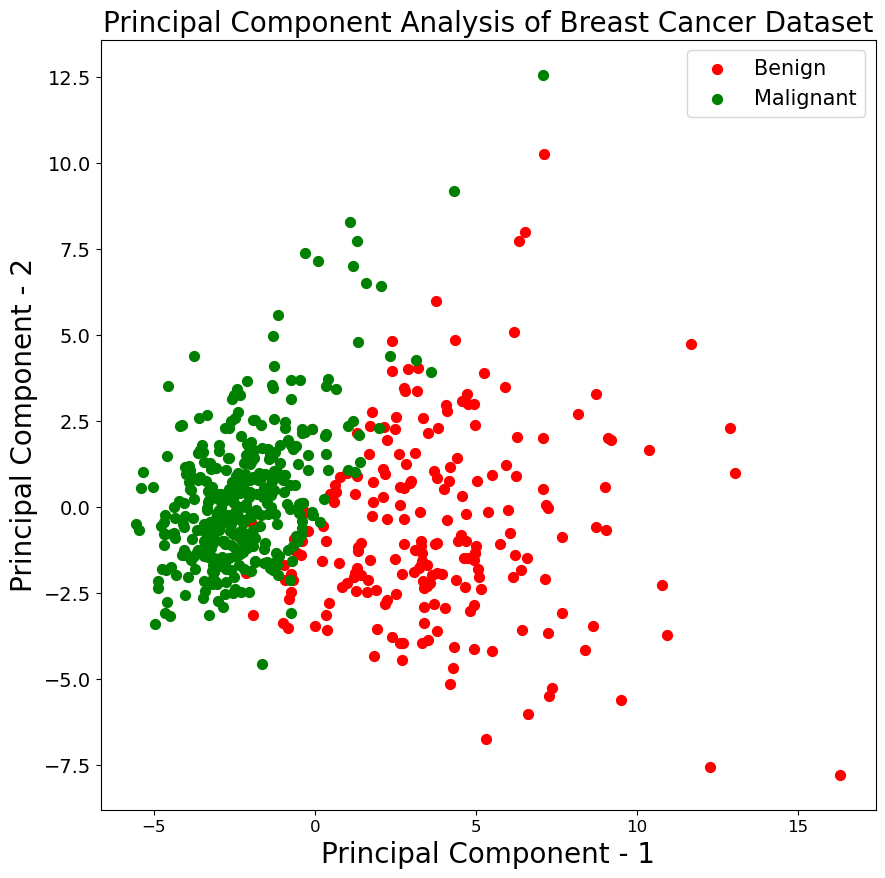

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


In [24]:

df_features = breast_dataset.drop(['label'], axis=1)


df_pc = pd.DataFrame(pca_breast.components_, columns = df_features.columns)

Text(158.22222222222223, 0.5, 'Principal Components')

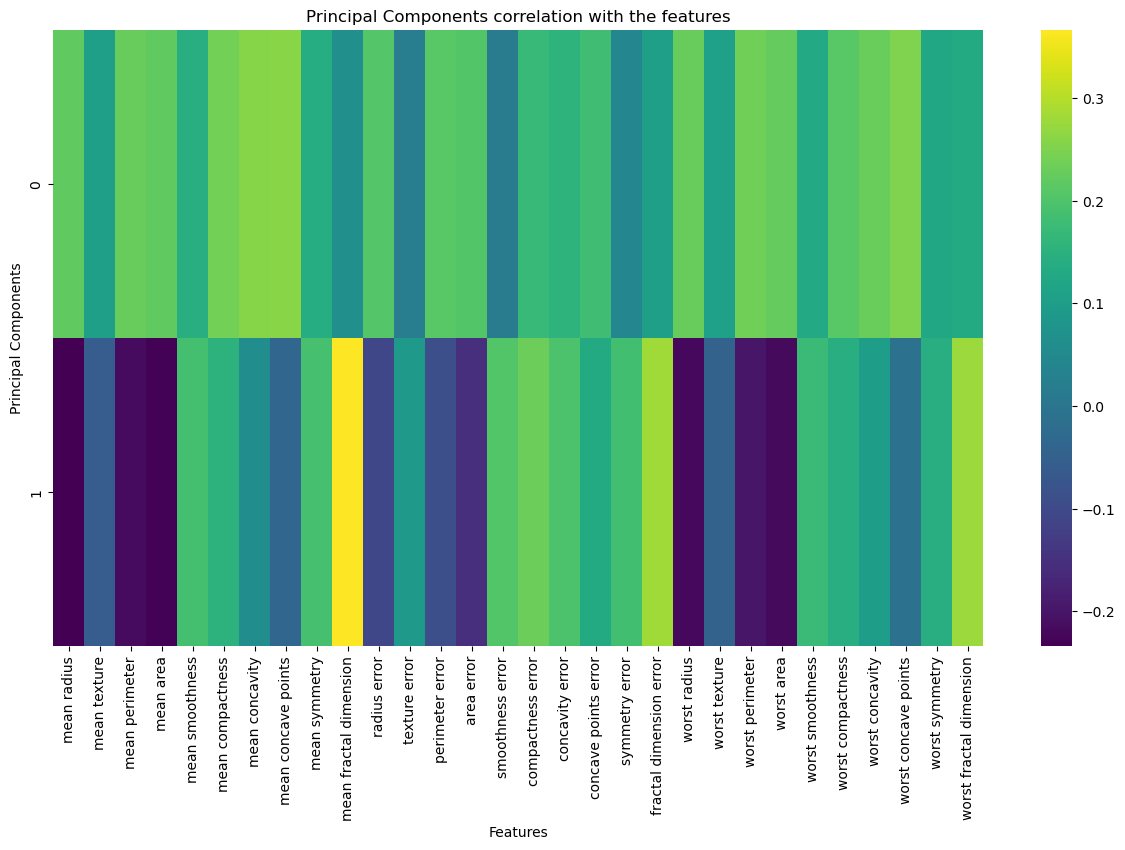

In [25]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')